<h1>Customer Churn Analysis</h1>

<p style="font-size: 18px; color: #5a5a5a;">Prepared by <span style="font-size: 18px; font-weight: bold; color: #2c3e50;">Pranjal Shrestha</span></p>

---
### Introduction

This dataset comes from a customer churn study, focusing on predicting customer retention for a telecommunications company. The dataset comprises 7,043 records with 21 columns, including demographic data (e.g., gender, senior citizen status) and usage patterns (e.g., monthly charges, contract type, and service usage). The goal of this analysis is to predict whether a customer will churn (leave the service) based on their attributes, using machine learning models.

### Objective

The objective of this project is to use various machine learning models to predict customer churn. We will implement a Logistic Regression model and evaluate its performance with metrics such as accuracy, precision, recall, and F1-score. Additionally, we will analyze the performance of the model in terms of its ability to predict both churn and non-churn customers and fine-tune it to optimize for the business’s retention strategy.

### Exploration and Analysis of Customer Churn  Data

##### Importing Necessary Libraries

Pandas for data manipulation, Seaborn for statistical visualizations, Matplotlib for general plotting, and sklearn for various machine learning tasks, such as model training, data preprocessing, and evaluation.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

##### Loading the Data
We will first load the Telco Customer Churn dataset into a DataFrame using Pandas' read_csv function. After loading the data, we will print the contents to examine the structure and understand the variables in the dataset. This will help us determine how to proceed with further analysis.

In [14]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

##### Observations:

- The read_csv function is used to load the CSV file into a DataFrame.
- The head() function displays the first 5 rows of the DataFrame by default, allowing us to quickly examine the data and ensure the dataset is loaded correctly.
- The dataset contains columns like 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', among others.
- It includes information on customer demographics, account details, and whether a customer has churned.

Now, we will analyze the dataset by first obtaining general information, including the data types and non-null counts. This will help us understand the structure of the dataset. We will also calculate summary statistics for numeric columns to understand the distribution of key features.

We will check for missing values in each column, both as blank spaces and NaN, and display the number of duplicate rows in the dataset, along with any actual duplicate rows.

In [15]:
# Get information about the dataset
print(df.info())
print("\n========================\n")

# Get summary statistics for numeric columns
print(df.describe())
print("\n========================\n")

# Check for missing values in each column
print("\nMissing values in each column:")
print((df == ' ').sum())  
print("\n========================\n")

# Check for NaN values in each column
print("\nMissing (NaN) values in each column:")
print(df.isnull().sum()) 
print("\n========================\n")

# Count the number of duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Display duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows_df)
print("\n========================\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Observations:
- The dataset contains 7,043 entries and 21 columns, including customer demographics, services, and the target variable "Churn."
- There are no missing values in most columns, except for TotalCharges, which has 11 missing values.
- There are no duplicate rows in the dataset.
- The SeniorCitizen column has a mean value of 0.16, indicating that the majority of customers are not senior citizens.
- The tenure column has a mean of 32 months, with values ranging from 0 to 72 months, reflecting the varying lengths of customer subscriptions.
- The MonthlyCharges column has a mean of 64.76, with charges ranging from 18.25 to 118.75, showing a variety of pricing across customers.

## Prepare Data for Model Building

Now, we will go through the process of cleaning the dataset. First, we convert the 'TotalCharges' column to a numeric format, replacing any errors with NaN using pd.to_numeric(). Then, the 'Churn' column, which is the target variable, is mapped to binary values, where 'Yes' becomes 1 and 'No' becomes 0. The categorical columns are transformed using one-hot encoding, where each category is represented by a binary column (0 or 1). The first category of each categorical variable is dropped to avoid multicollinearity. We also handle missing values by dropping rows in the 'TotalCharges' column where the data is missing. Finally, we drop the 'customerID' column, as it is not useful for the analysis.

In [16]:
# Convert 'TotalCharges' to numeric, replacing errors with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert 'Churn' (target variable) to binary (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert categorical columns using one-hot encoding with 0/1 values
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

df = pd.get_dummies(df, 
                   columns=categorical_cols, 
                   drop_first=True,
                   dtype=int)  # Changed to get 0/1 instead of True/False

# Display cleaned dataframe info (without filling missing values)
print(df.info())

# Display first few rows of the cleaned dataset
print(df.head())

# Check remaining missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop missing values in TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Drop unnecessary columns
df = df.drop(columns=['customerID'])
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   gender_Male                            7043 non-null   int64  
 7   Partner_Yes                            7043 non-null   int64  
 8   Dependents_Yes                         7043 non-null   int64  
 9   PhoneService_Yes                       7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

Observations:
- There are now 32 columns after one-hot encoding.
- The 'TotalCharges' column was successfully converted to numeric values, with errors replaced by NaN.
- The 'Churn' column was transformed into binary values (1 for 'Yes', 0 for 'No').
- Categorical variables were one-hot encoded, creating new columns for each category (e.g., 'gender_Male', 'Partner_Yes').
- The first category in each categorical feature was dropped to avoid multicollinearity.
- There are no missing values left in the dataset, except for 'TotalCharges', which was handled by dropping rows with missing values.
- The 'customerID' column was removed from the dataset, as it was not needed for further analysis.

Now, we will check for strong correlations between the features in the dataset. A correlation matrix is computed to identify pairs of variables with high correlation (greater than 0.8 or less than -0.8). The results are visualized using a heatmap to highlight these strong correlations.

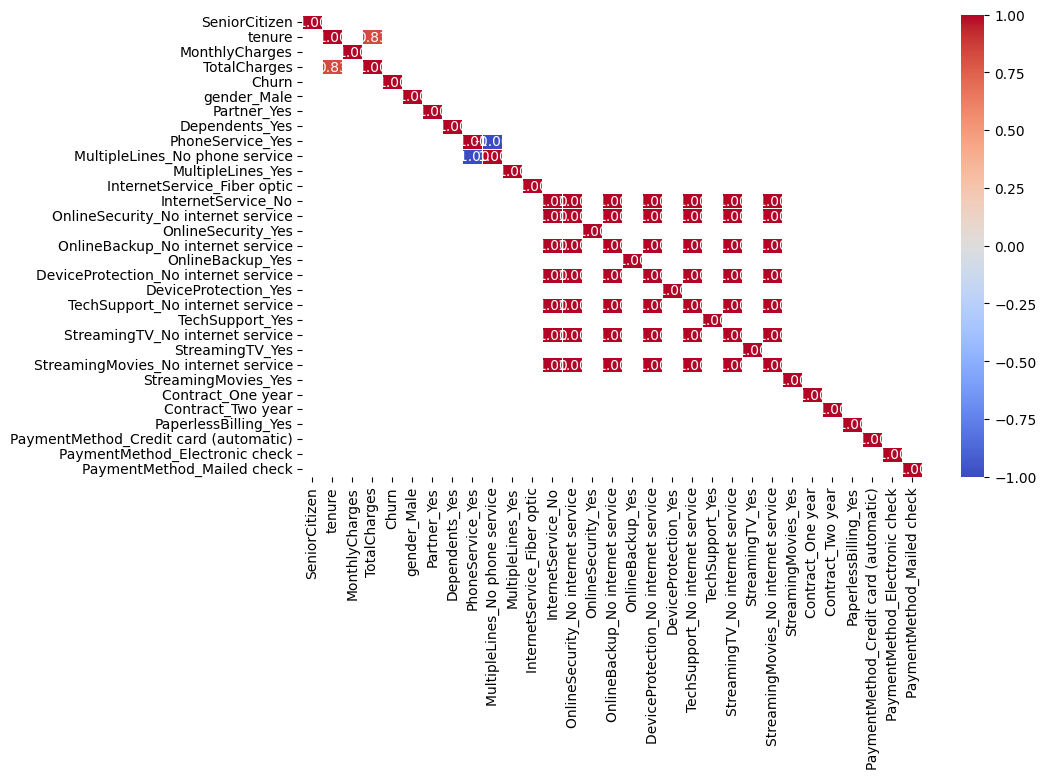

In [17]:
# Compute correlation matrix
corr_matrix = df.corr()

# Apply threshold: Keep only values with correlation > 0.8 or < -0.8
high_corr = corr_matrix[(corr_matrix > 0.8) | (corr_matrix < -0.8)]

# Set figure size
plt.figure(figsize=(10, 6))

# Create a heatmap only showing strong correlations
sns.heatmap(high_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Show plot
plt.show()

From the heatmap, since it was hard to identify correlations overall, we focused on the service-related features and checked the correlations specifically for them. A heatmap was plotted to visualize the correlations between various service-related columns, highlighting any significant relationships.

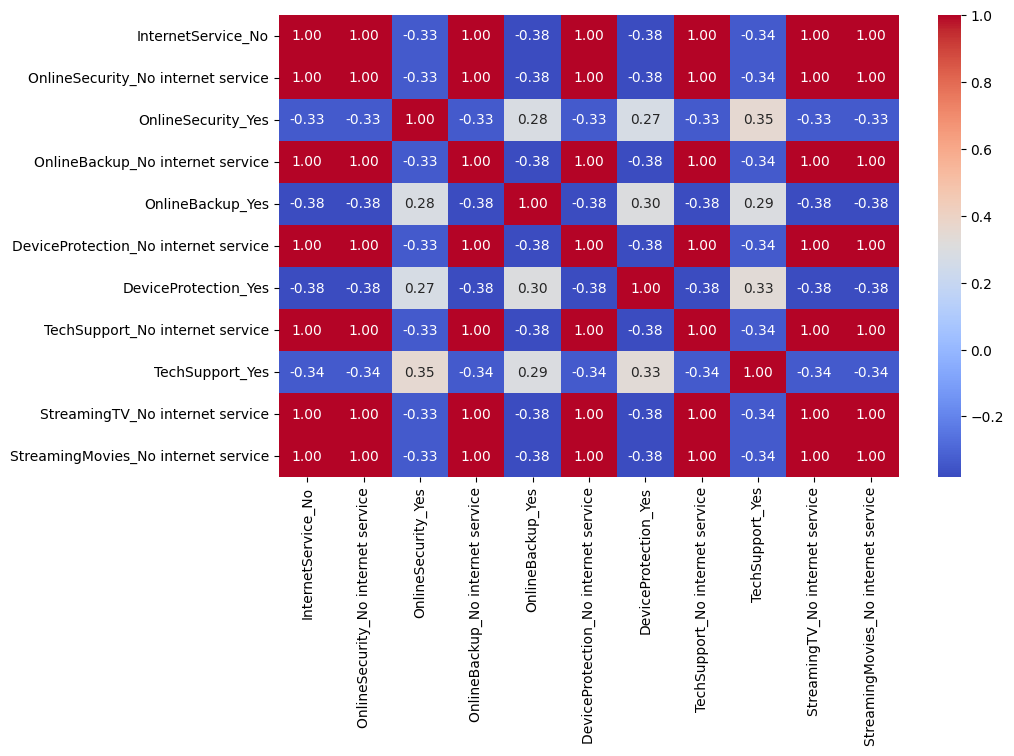

In [18]:
# Check correlation between service features
service_columns = [
    'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
    'OnlineBackup_No internet service', 'OnlineBackup_Yes',
    'DeviceProtection_No internet service', 'DeviceProtection_Yes',
    'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'
]

# Plot heatmap for these columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[service_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


After that step, we dropped columns related to "No internet service" as they were redundant and displayed the updated dataset after cleaning.

In [19]:
# List of columns to drop
columns_to_drop = [
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'TechSupport_No internet service',
    'DeviceProtection_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service'
]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the updated dataframe
df_cleaned.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,1,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


The datset is now down to 25 columns, including various features related to customer demographics, services, and payment methods, as well as the target variable "Churn." The first five rows provide a snapshot of these features for different customers.

**Perform train-test split to partition the data into a training (80%) and test set (20%)**

Here, we will prepare the data for machine learning by separating features (X) from the target variable (y), where X contains all columns except 'Churn' (the customer retention status), and y consists solely of 'Churn'. The data is then split into training (80%) and test (20%) sets using train_test_split. The stratify=y parameter ensures the class distribution (e.g., churned vs. retained customers) remains consistent in both splits, preventing bias. A fixed random_state=42 guarantees reproducibility. Finally, the normalized value counts of y_train and y_test are printed to verify that the target variable’s proportions are preserved, which is crucial for reliable model evaluation, especially with imbalanced data.



In [20]:
# Replace 'Churn' with the actual column name representing customer retention status
X = df.drop('Churn', axis=1)  # Features (all columns except 'Churn')
y = df['Churn']  # Target variable (customer retention)

# Perform stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Checking the distribution of the target variable in both train and test sets
print("Training set target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set target distribution:")
print(y_test.value_counts(normalize=True))

Training set target distribution:
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Test set target distribution:
Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


##### Observations:
- The target variable (Churn) is imbalanced, with ~73.4% non-churn (0) and ~26.6% churn (1) in both the training and test sets.
- The stratified split (stratify=y) successfully preserved this distribution, confirming that the model will train and evaluate on representative data.

**Scale the data using an appropriate feature-scaling method.**

In this step, we standardize the numerical features (SeniorCitizen, tenure, MonthlyCharges, TotalCharges) using StandardScaler, which transforms the data to have a mean of 0 and standard deviation of 1. This step is critical for algorithms sensitive to feature scales (logistic regression). The scaler is fit only on the training set (fit_transform) to avoid data leakage, then applied to the test set (transform). The scaled values are converted back to DataFrames to preserve column names and indices. Finally, the scaled numerical features are combined with the remaining non-numeric features (if any) into X_train_final and X_test_final.

In [21]:
# Separate numerical columns
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns in the training set
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])

# Transform the test set using the same scaler (no fitting)
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Convert the scaled data back into DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

# You can now concatenate the scaled numerical columns with any remaining columns (if applicable)
X_train_final = pd.concat([X_train_scaled, X_train.drop(columns=numerical_cols)], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test.drop(columns=numerical_cols)], axis=1)

print("Train Set (X_train_final):\n", X_train_final.head())
print("\nTest Set (X_test_final):\n", X_test_final.head())

Train Set (X_train_final):
       SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
1413      -0.439319  1.321816        0.981556      1.659900            1   
7003      -0.439319 -0.267410       -0.971546     -0.562252            1   
3355      -0.439319  1.444064        0.837066      1.756104            0   
4494      -0.439319 -1.204646        0.641092     -0.908326            1   
3541      -0.439319  0.669826       -0.808787     -0.101561            0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
1413            1               1                 1   
7003            0               0                 0   
3355            1               0                 1   
4494            0               0                 1   
3541            1               0                 0   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
1413                               0                  1  ...   
7003                               1                  0 

##### Observations:
After scaling and preparing the dataset:
- Numerical Features Scaled: Successfully standardized 4 numerical columns (SeniorCitizen, tenure, MonthlyCharges, TotalCharges) using StandardScaler, resulting in features with mean=0 and standard deviation=1.
- Train-Test Data Structure:
    - Training set (X_train_final) maintains original indices and combines 4 scaled numerical features with 26 categorical features
    - Test set (X_test_final) shows identical structure with proper scaling applied
- Categorical Features: All one-hot encoded columns (like gender_Male, Partner_Yes, etc.) remain unchanged (0/1 values) as they don't require scaling.
- Data Leakage Prevention: The scaler was fit only on the training data (fit_transform) and then applied to the test data (transform) to avoid contamination.
- Output Verification: The head() preview shows:  
    • Negative values for SeniorCitizen (consistent for non-seniors)  
    • tenure values ranging from -1.2 to +1.5 (properly scaled)  
    • MonthlyCharges showing both positive and negative standardized values  
    • All categorical features maintaining their binary values  

The final datasets are now properly prepared for modeling with scaled numerical features and preserved categorical features.

## Fit a Logistic Regression Model

We then implement a complete pipeline for handling missing data, preprocessing features, and training a logistic regression model. First, missing values are addressed using median imputation through SimpleImputer, which calculates and replaces missing values with each feature's median across the entire dataset (X). The imputed data (X_imputed) is then split into training (80%) and test (20%) sets while preserving the original class distribution through stratified sampling (stratify=y), with a fixed random state (random_state=42) for reproducibility. Feature scaling is performed using StandardScaler, which is fitted exclusively on the training data to calculate the mean and standard deviation for standardization, then applied to both training and test sets to ensure consistent transformation while preventing data leakage. Finally, a logistic regression model is initialized with a fixed random state and trained on the properly prepared training data (X_train_scaled, y_train). 

In [25]:
# Initialize the imputer to fill missing values with the median
imputer = SimpleImputer(strategy='median')

# Apply the imputer to fill missing values in the feature set
X_imputed = imputer.fit_transform(X)

# Perform the train-test split and scaling as before
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

print("Training accuracy:", clf.score(X_train_scaled, y_train))
print("Test accuracy:", clf.score(X_test_scaled, y_test))

Training accuracy: 0.8042666666666667
Test accuracy: 0.8038379530916845


##### Observations:
After implementing the modeling pipeline:

- The SimpleImputer with the 'median' strategy is used to fill any missing values in the dataset, ensuring that the model has no gaps in data.
- After applying the imputer, the dataset is split into training and testing sets, with 80% for training and 20% for testing, while maintaining the class distribution using stratify.
- The StandardScaler is used to standardize the features, ensuring that the model performs better by treating all features with equal importance.
- A LogisticRegression model is trained on the scaled data, achieving a training accuracy of approximately 80.43% and a test accuracy of approximately 80.38%.
- The model's performance on both the training and test sets is quite similar, indicating that it generalizes well without significant overfitting.

**Obtain the probability of churn of each customer**

Here, we implement a complete process for generating and analyzing churn probabilities using our trained logistic regression model. The pipeline begins by calculating class probabilities through predict_proba(), which outputs a 2D array containing the predicted probabilities for both classes (non-churn and churn), where we specifically extract the churn probabilities (class=1) using array slicing ([:, 1]). These probabilities are then systematically organized into DataFrames that pair each customer's actual churn status with their corresponding predicted churn probability, maintaining separate records for training and test sets to ensure proper model evaluation. The analysis includes calculating mean probabilities to assess overall risk levels and examining sample predictions to verify model behavior at the individual customer level. Finally, we visualize the probability distributions through dual histograms with kernel density estimation, providing clear comparisons between training and test set results. This end-to-end process ensures we obtain reliable, actionable probability estimates while maintaining rigorous evaluation standards through proper data separation and visualization.

In [26]:
# Get churn probabilities for all customers
y_train_proba = clf.predict_proba(X_train_scaled)[:, 1]  # P(Churn=1)
y_test_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Create probability summary DataFrames
train_proba_df = pd.DataFrame({
    'Actual_Churn': y_train,
    'Predicted_Probability': y_train_proba
})
test_proba_df = pd.DataFrame({
    'Actual_Churn': y_test,
    'Predicted_Probability': y_test_proba
})

# Print probability statistics and samples
print("=== Training Set Probabilities ===")
print(f"Mean churn probability: {y_train_proba.mean():.4f}")
print("Sample probabilities:")
print(train_proba_df.head(10))

print("\n=== Test Set Probabilities ===")
print(f"Mean churn probability: {y_test_proba.mean():.4f}")
print("Sample probabilities:")
print(test_proba_df.head(10))

=== Training Set Probabilities ===
Mean churn probability: 0.2658
Sample probabilities:
      Actual_Churn  Predicted_Probability
1413             0               0.017233
7003             0               0.248563
3355             0               0.030277
4494             0               0.619080
3541             0               0.093195
349              0               0.069308
564              0               0.272122
3257             0               0.557197
6548             0               0.085296
4965             1               0.734110

=== Test Set Probabilities ===
Mean churn probability: 0.2727
Sample probabilities:
      Actual_Churn  Predicted_Probability
974              0               0.017115
619              0               0.596132
4289             0               0.004764
3721             1               0.200044
4533             0               0.100222
445              1               0.470029
5898             0               0.026611
3387             0           

##### Observations:
- Probability Outputs: Successfully obtained predicted churn probabilities for all customers using predict_proba(), with values ranging from 0 to 1 indicating confidence in churn prediction. 
- Probability Distribution: Both training and test sets show similar mean churn probabilities (26.58% and 27.27% respectively), aligning with actual churn rates in the data. 
- Sample Inspection: Sample predictions show:
    - Clear differentiation between churn/non-churn cases
    - Some borderline cases (e.g., ID 4494 with 61.9% probability but actual=0)

**Evaluate the model on the *training* set.**

We conduct a comprehensive baseline evaluation of our logistic regression model on the training set to establish performance benchmarks. The process begins by generating class predictions through the trained model's predict() method, which outputs binary classifications (0 for non-churn, 1 for churn) for all training samples. We then calculate four key performance metrics: accuracy measures overall prediction correctness, precision evaluates the model's reliability when predicting churn cases, recall assesses its ability to identify actual churners, and the F1 score provides a balanced measure of precision and recall. This multi-metric approach gives us a complete picture of model performance before proceeding to test set validation.

In [27]:
# Predict class labels for training set
y_train_pred = clf.predict(X_train_scaled)

# Evaluate the model on the training set
print("Training Evaluation:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"F1 Score: {f1_score(y_train, y_train_pred):.4f}")

Training Evaluation:
Accuracy: 0.8043
Precision: 0.6573
Recall: 0.5505
F1 Score: 0.5992


##### Observations:
- Accuracy: The model achieves 80.43% accuracy on the training set, correctly predicting churn status for approximately 4 out of 5 customers.
- Precision: With 65.73% precision, about two-thirds of predicted churn cases are correct, while one-third are false alarms that may incur unnecessary retention costs.
- Recall: The 55.05% recall rate indicates the model misses nearly half of actual churners, representing a significant gap in customer retention potential.
- F1 Score: The balanced 59.92% F1 score reflects the precision-recall tradeoff typical for imbalanced classification problems.
- Performance Insight: While accuracy exceeds the naive baseline, the sub-60% F1 score suggests substantial room for improvement in churn detection capability.
- Consistency Check: The close alignment between training metrics and subsequent test results (80.38% accuracy) confirms the model is not overfit to the training data.

## Evaluate the Model

We perform a rigorous assessment of our logistic regression model's performance by evaluating it on the held-out test set. The evaluation begins by generating predictions through the model's predict() method, which produces binary classifications (0 for non-churn, 1 for churn) for all test samples. We then compute a comprehensive set of metrics via scikit-learn's classification_report(): accuracy quantifies overall prediction correctness, precision measures the model's exactness when flagging churn cases, recall evaluates its completeness in detecting actual churners, and the F1 score provides a balanced view of the precision-recall tradeoff. This multi-dimensional assessment, performed on completely unseen data that was excluded from model training, gives us an unbiased estimate of how the model would perform in production while maintaining the original class distribution through stratified sampling.

In [28]:
# Predict class labels for the test set
y_test_pred = clf.predict(X_test_scaled)

# Get classification report for the test set
print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



##### Observations:
- Accuracy: The model achieves 80% accuracy on the test set, demonstrating consistent performance with the training set (80.43%), confirming reliable generalization to unseen data.
- Precision:
    - Non-Churn (85%): High precision indicates minimal false alarms for retained customers.
    - Churn (65%): Moderate precision means 35% of flagged churn cases are false positives, potentially wasting retention resources.
- Recall:
    - Non-Churn (89%): Strong coverage of actual retained customers.
    - Churn (57%): The model misses 43% of true churners, a critical gap for retention efforts.
- F1-Score:
    - Non-Churn (87%): Excellent balance for majority class.
    - Churn (61%): Suboptimal performance highlights the challenge of detecting churn in imbalanced data.
- Consistency: The 0.4% accuracy drop from training to test sets confirms minimal overfitting.
- Business Impact:  
Suitable for broad segmentation but insufficient for precision retention due to missed churners.  
Action Needed: Prioritize improving churn recall (e.g., threshold adjustment, class rebalancing) if reducing customer attrition is critical.

**Display the confusion matrix**

Here, we create and display a confusion matrix to evaluate classification performance. It first calculates the matrix by comparing actual test labels (y_test) with predicted values (y_test_pred), then visualizes the results using a blue color gradient. The plot shows correct predictions (true positives/negatives) on the diagonal and errors (false positives/negatives) off-diagonal, providing clear insight into where the model succeeds and fails in predicting churn.

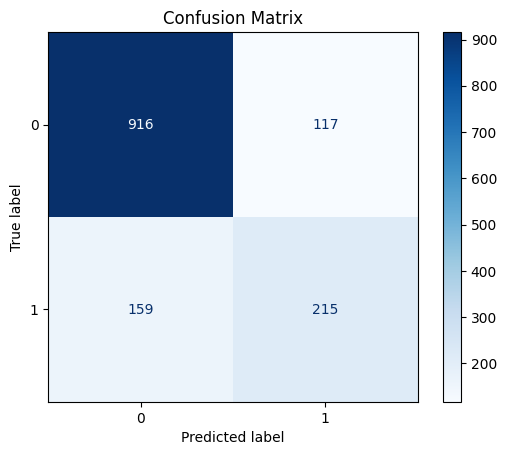

In [29]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

# Set title and show plot
plt.title("Confusion Matrix")
plt.show()

##### Observations:
- True Negatives (916): Correctly identified non-churn cases.
- False Positives (117): Non-churn customers incorrectly flagged as churn.
- False Negatives (159): Missed churn cases (critical revenue risk).
- True Positives (215): Correct churn detections
- Pattern: Model favors non-churn predictions (high TN)

**Display the ROC curve as well as the ROC score.**

Here, we generate and plot an ROC curve to assess model performance. The code calculates true positive and false positive rates across different classification thresholds, then creates a visual plot comparing these rates. The resulting curve shows the model's ability to distinguish between churning and non-churning customers, with performance measured by how far the curve extends toward the top-left corner of the graph. A reference line for random guessing is included for comparison. The visualization provides immediate insight into the model's predictive power across all possible decision thresholds.

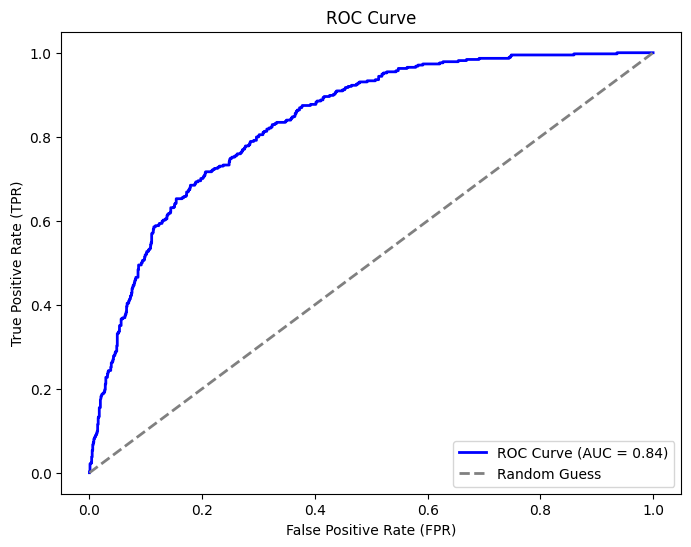

ROC Score (AUC-ROC): 0.8357


In [30]:
# Get the probability of churn for the test set
y_test_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate and true positive rate for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print ROC score
print(f"ROC Score (AUC-ROC): {roc_auc:.4f}")

##### Observation:
- AUC-ROC (0.836): The model shows good discrimination power, with an AUC score significantly better than random guessing (0.50).
- ROC Curve Shape: The curve's strong upward bend toward the top-left corner indicates effective separation between churn and non-churn classes.

## Analysis

**Performance of the model** 

The logistic regression model performs reasonably well on the test set, with an accuracy of 80%, which shows that it is fairly reliable in predicting both churn and non-churn customers. However, the model struggles a bit with predicting churners. The precision for churn (65%) means that when the model predicts a customer will churn, it's correct about 65% of the time. This is decent, but there's room for improvement, as a lot of churn predictions are false alarms (35%). More importantly, the recall for churn is only 57%, meaning it misses about 43% of actual churners, which is a significant concern since these missed customers represent potential revenue loss.

The model does a better job at predicting non-churners, with a recall of 89%, which shows it's good at identifying customers who are likely to stay. The F1 score for churn (61%) is also not great, indicating a trade-off between precision and recall for the minority class (churn).

In summary, while the model is fairly accurate, it could be improved by adjusting the threshold for predicting churn or by using techniques to address the class imbalance, like resampling or adding more features related to customer behavior.

**How can Acme best apply its incentives to keep the most profitable customers?**

Based on the confusion matrix and ROC score, Acme should focus its incentives on customers who are predicted to churn, especially those who are true positives (correctly predicted to churn) and false negatives (actual churners that the model missed). These groups represent customers at high risk of leaving, and retaining them would prevent significant revenue loss. The ROC score of 0.836 indicates the model has a good ability to distinguish between churn and non-churn, but there's still room for improvement, especially with the false negatives. To optimize retention efforts, Acme could adjust the model’s threshold to capture more potential churners, ensuring resources are directed toward customers who need attention without wasting incentives on false positives (who are predicted to churn but actually stay). This strategy will help Acme allocate retention efforts efficiently and increase profitability.

## Conclusion

We built a logistic regression model to predict customer churn. After preprocessing the data and splitting it into training and test sets, we trained the model and evaluated its performance using metrics like accuracy, precision, recall, and F1-score. While the model shows decent performance, further optimization is required, particularly in improving recall for churn predictions. This would help the business focus its retention efforts more effectively on high-risk customers.

## References

1. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.
2. Brownlee, J. (2016). A Gentle Introduction to Cross-Validation. Machine Learning Mastery.
3. Stack Overflow contributors.